# Steps vs. Keypresses Analysis

By Kenneth Burchfiel

Released under the MIT license

This program performs a regression analysis to determine the relationship between my daily keypress count (as logged by Whatpulse), and my daily Fitbit step count. The keypress count was produced by my whatpulse_viewer Jupyter notebook, and the steps count was generated by my fitbit_steps_reader notebook.

I will add more documentation/explanation to this file later on.

In [1]:
import time
start_time = time.time() # Allows the program's runtime to be measured
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
df_daily_steps = pd.read_csv('daily_steps.csv')
df_daily_steps['Date'] = pd.to_datetime(df_daily_steps['Date'])
df_daily_steps.set_index('Date',inplace=True)
df_daily_steps

,steps,7_day_avg
Date,,
2020-01-20,166,NaN
2020-01-21,4324,NaN
2020-01-22,7259,NaN
2020-01-23,8154,NaN
2020-01-24,15363,NaN
...,...,...
2021-11-15,11696,9438.142857
2021-11-16,12117,10624.428571
2021-11-17,7723,10546.285714


In [4]:
df_combined_daily_keypresses = pd.read_csv('whatpulse_daily_keypresses.csv')

In [8]:
df_combined_daily_keypresses
df_combined_daily_keypresses['Date'] = pd.to_datetime(df_combined_daily_keypresses['Date'])
df_combined_daily_keypresses.set_index('Date',inplace=True)

In [9]:
df_combined_daily_keypresses

,keypresses,7_day_ma,30_day_ma,365_day_ma
Date,,,,
2020-09-21,19081,NaN,NaN,NaN
2020-09-22,32771,NaN,NaN,NaN
2020-09-23,32065,NaN,NaN,NaN
2020-09-24,34698,NaN,NaN,NaN
2020-09-25,47038,NaN,NaN,NaN
...,...,...,...,...
2021-11-15,19834,32841.571429,28461.966667,29428.819178
2021-11-16,52537,29805.714286,30203.266667,29427.871233
2021-11-17,42004,30455.428571,30104.400000,29378.164384


In [10]:
df_steps_keypresses = df_combined_daily_keypresses.merge(df_daily_steps,how='inner', on='Date')
df_steps_keypresses = df_steps_keypresses[['keypresses', 'steps']]
df_steps_keypresses

,keypresses,steps
Date,,
2020-09-21,19081,10074
2020-09-22,32771,2804
2020-09-23,32065,4896
2020-09-24,34698,6826
2020-09-25,47038,8294
...,...,...
2021-11-15,19834,11696
2021-11-16,52537,12117
2021-11-17,42004,7723


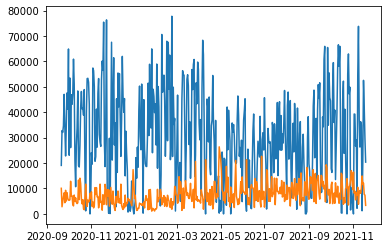

In [11]:
plt.plot(df_steps_keypresses)

In [12]:
# Based on https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
y = df_steps_keypresses['steps']
x = df_steps_keypresses['keypresses']
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  steps   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     120.4
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           8.14e-25
Time:                        15:12:05   Log-Likelihood:                -4107.4
No. Observations:                 425   AIC:                             8219.
Df Residuals:                     423   BIC:                             8227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.117e+04    359.610     31.065      0.000    1.05e+04    1.19e+04
keypresses    -0.1115      0.010    -10.971      0.000      -0.132      -0.092
==============================================================================
Omnibus:                       39.672   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.939
Skew:                           0.734   Prob(JB):                     1.43e-11
Kurtosis:                       3.817   Cond. No.                     6.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
results.params

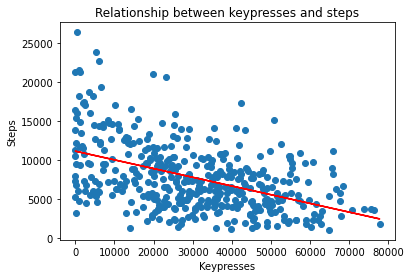

In [13]:
fig, axes = plt.subplots()
fig.set_facecolor('white')
plt.scatter(df_steps_keypresses['keypresses'], df_steps_keypresses['steps'])
# The following line of code produces the best fit line using the intercept and coefficient of the regression output.
plt.plot(df_steps_keypresses['keypresses'], results.params[0] + df_steps_keypresses['keypresses']*results.params[1], color='red')
plt.title("Relationship between daily keypresses and daily steps")
plt.xlabel('Keypresses')
plt.ylabel('Steps')
plt.savefig('graphs\\keypresses_steps_scatter.png', dpi=400)

In [ ]:
end_time = time.time()
run_time = end_time - start_time
run_minutes = run_time // 60
run_seconds = run_time % 60
print("Completed run at",time.ctime(end_time),"(local time)")
print("Total run time:",'{:.2f}'.format(run_time),"second(s) ("+str(run_minutes),"minute(s) and",'{:.2f}'.format(run_seconds),"second(s))") # Only meaningful when the program is run nonstop from start to finish
